# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

Slope: -5.29
Intercept: 5.38
When x=1 then y is: 0.08


C:\Users\miemt\Desktop\python\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


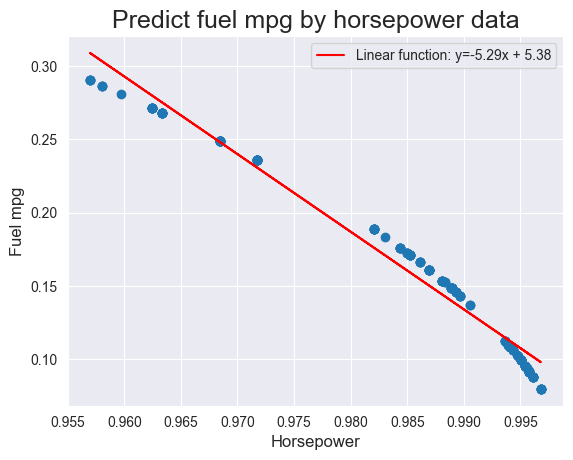

In [2]:
## Ex 1
# `Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

# - Programatically download the data from the above link.
# - Import the data into a Pandas dataframe.
import pandas as pd
file = 'cars.csv'
df = pd.read_csv(file)

# - Show the head of the Pandas dataframe.
df.head()

### Feature engineering
# - Reduce the dataset by:
#   - Make == Honda
#   - Fueltype == Gasoline
#   - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
#   - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
#   - Normalize data (reduce values to be between 0 and 1)
from sklearn import preprocessing
df = df.loc[(df['Identification.Make'] == 'Honda') & (df['Fuel Information.Fuel Type'] == 'Gasoline')]
df = df[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]
d = preprocessing.normalize(df)
scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df

### Linear regression
# - Perform linear regression where x = horsepower and y = mpg
# - What is the coefficient (slope) of your model? What does this number mean?
# - According to your model, what is `y` when `x=1`.
# - Show the regression line on a scatterplot with the other datapoints.

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
x = scaled_df[['Engine Information.Engine Statistics.Horsepower']]
y = scaled_df[['Fuel Information.Highway mpg']]

model = LinearRegression()
model.fit(x, y) # finds the best fit of the linear plot line
predicted_y = model.predict(x) # gets an array of the y values based on the fit
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print("Slope: {:.2f}".format(slope)) # hældning
print("Intercept: {:.2f}".format(intercept)) # konstant

predict1 = model.predict([[1]])[0][0]
print("When x=1 then y is: {:.2f}".format(predict1))

plt.scatter(x, y)
plt.plot(x, predicted_y, color = 'red', label="Linear function: y={:.2f}x + {:.2f}".format(slope, intercept))
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Fuel mpg', fontsize=12)
plt.title('Predict fuel mpg by horsepower data', fontsize=18)
plt.legend()
plt.show()
# df.head()

